# 과제
과제는 총 4개입니다.

1. n-gram 실습하기
2. Word2Vec 실습하기
3. Self-Attention 이해하고 서술하기
4. Multi-head Attention 이해하고 서술하기

4개에 대해 각각 서술해주시면 됩니다!

## 1. 1-gram, 2-gram, 3-gram 만들어보는 실습해보기
  - sentences 배열에  **1-gram 10개 이상, 2-gram 5개 이상, 3-gram 2개 이상을 만족하는 5개의 문장**을 만들어보세요

In [1]:
import numpy as np
import gensim
from gensim.models import Word2Vec
from collections import Counter
from itertools import islice
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
# 1. n-gram 모델 만들기
def generate_ngrams(text, n):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

### 1-gram 10개 이상, 2-gram 5개 이상, 3-gram 2개 이상을 만족하는 5개의 문장 작성해보기
sentences = [
    "나",
    "난",
    "너",
    "넌",
    "내"
]

for n in range(1, 4):
    all_ngrams = []
    for sentence in sentences:
        all_ngrams.extend(generate_ngrams(sentence, n))
    print(f"{n}-gram ({len(all_ngrams)}개):", all_ngrams)



1-gram (5개): ['나', '난', '너', '넌', '내']
2-gram (0개): []
3-gram (0개): []


## 2. Word2Vec을 이용한 실습


In [5]:
# Google에서 사전 훈련된 Word2Vec 모델 다운로드 (약 1.5GB)
import gensim.downloader as api
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


다음은 king, Berlin, sock에 대해 출력하는 examples입니다.

In [6]:
# 예제 벡터 연산 수행
def perform_vector_math(examples):
    for a, b, c in examples:
        result = model.most_similar(positive=[a, c], negative=[b], topn=1)
        print(f"{a} - {b} + {c} ≈ {result[0][0]}")

examples = [
        ("queen", "woman", "man"),  # "queen" - "woman" + "man" ≈ "king"
        ("hand", "glove", "foot"),  # "hand" + "glove" ≈ "foot" + "sock"
    ]
# 예제 실행
perform_vector_math(examples)



queen - woman + man ≈ king
hand - glove + foot ≈ feet


Berlin은 Paris, ---, +++를 이용해 출력된다. 여기서 ---와 +++를 입력해보세요

In [7]:
answer = [
    # ---, +++ 에 알맞는 단어를 넣어서 Berlin이 출력되도록 하세요.
    ("Paris", "France", "Germany"),  # "Paris" - "---" + "+++" ≈ "Berlin"
]

perform_vector_math(answer)

Paris - France + Germany ≈ Berlin


## 3. Self-Attention Heatmap

Self-Attention heatmap을 통해 단어간의 관계를 분석하고 서술해보세요

1. Self-Attention (단일 Attention)


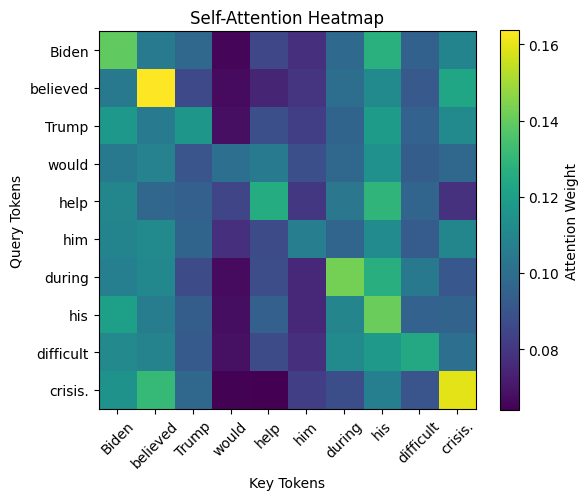

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------
# 공통: softmax 및 Scaled Dot-Product Attention 함수
# -----------------------------------
def softmax(x, axis=-1):
    """안정적인 softmax 함수 구현"""
    exp_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

def scaled_dot_product_attention(Q, K, V):
    """
    Q, K, V로부터 scaled dot-product attention 계산
    :return: output, attention_weights
    """
    d_k = Q.shape[-1]
    scores = np.dot(Q, K.T) / np.sqrt(d_k)
    attention_weights = softmax(scores, axis=-1)
    output = np.dot(attention_weights, V)
    return output, attention_weights

# -----------------------------------
# 1. Self-Attention (단일 Attention)
# -----------------------------------
print("1. Self-Attention (단일 Attention)")

# 대명사가 포함된 10단어 내외의 문장 예시
sa_sentence = "Biden believed Trump would help him during his difficult crisis."
sa_tokens = sa_sentence.split()

embedding_dim = 16  # 임베딩 차원
np.random.seed(0)
X = np.random.rand(len(sa_tokens), embedding_dim)

# Self-Attention에서는 Q, K, V 모두 동일하게 사용
Q = X.copy()
K = X.copy()
V = X.copy()

# Scaled Dot-Product Attention 계산
output_sa, attn_weights_sa = scaled_dot_product_attention(Q, K, V)

# heatmap 시각화 (x, y축 모두 토큰)
plt.figure(figsize=(6, 5))
plt.imshow(attn_weights_sa, cmap='viridis')
plt.colorbar(label='Attention Weight')
plt.xticks(ticks=range(len(sa_tokens)), labels=sa_tokens, rotation=45)
plt.yticks(ticks=range(len(sa_tokens)), labels=sa_tokens)
plt.title("Self-Attention Heatmap")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.tight_layout()
plt.show()

1. self-attention heatmap을 통해, 각 단어 간 attention 가중치 분포에서 어떤 패턴이 나타나는지 자유롭게 서술해주세요

: Heatmap에서 일부 단어 쌍은 높은 attention 값을 보인다. 특히 "believed" - "Biden", "crisis", "difficult" 같은 쌍에서 강한 연관성이 나타난다.
이는 "believed"가 행위 주체 "Biden"과 강한 연관을 가지기 때문이며 "crisis"와 "difficult"도 유사하게 같이 등장하는 경향이 있어 높은 attention을 가진다.

2. Heatmap안에 **his** 에서 Biden과 Trump 중에서 어떤 것이 가중치가 더 높고 왜 높은지 설명해주세요  

: Heatmap을 보면 "his"가 "Trump"와 더 강한 attention을 가진다.

"his" 행에서 "Trump" 열의 색이 "Biden"보다 상대적으로 밝다. 즉, "his"는 "Trump"와 더 높은 attention 가중치를 가진다. "his"는 소유격으로 문장에서 보통 직전에 등장한 인물의 소유를 나타낼 가능성이 높다. 즉, 문맥상 "his"는 "Trump"의 것일 가능성이 높아 self-attention이 "his"에서 "Trump"로 높은 가중치를 부여한 것으로 보인다.

## 4. Multi-Head Self-Attention

4개의 head를 보고 문제에 대해 서술해주세요

2. Multi-Head Self-Attention (4 heads)


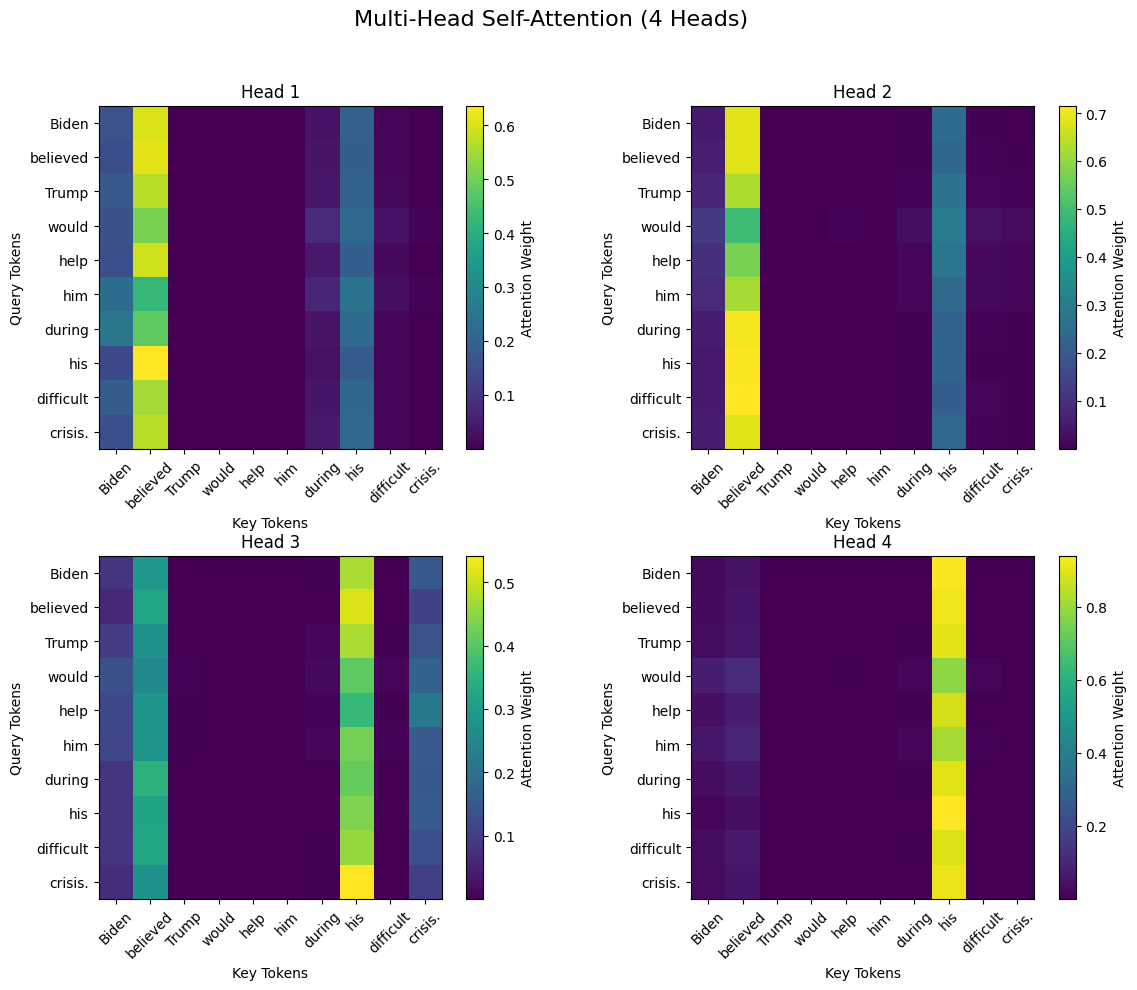

In [9]:
# -----------------------------------
# 2. Multi-Head Self-Attention (4 head, 2x2 grid)
# -----------------------------------
print("2. Multi-Head Self-Attention (4 heads)")

num_heads = 4
head_dim = embedding_dim // num_heads  # 각 head의 차원 (여기서는 2)

# 각 head마다 Q, K, V를 위한 가중치 행렬 생성
Wq = [np.random.rand(embedding_dim, head_dim) for _ in range(num_heads)]
Wk = [np.random.rand(embedding_dim, head_dim) for _ in range(num_heads)]
Wv = [np.random.rand(embedding_dim, head_dim) for _ in range(num_heads)]

attn_weights_heads = []
for i in range(num_heads):
    Q_i = np.dot(X, Wq[i])
    K_i = np.dot(X, Wk[i])
    V_i = np.dot(X, Wv[i])

    _, attn_weights_i = scaled_dot_product_attention(Q_i, K_i, V_i)
    attn_weights_heads.append(attn_weights_i)

# 2x2 grid로 각 head의 heatmap 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, ax in enumerate(axes):
    im = ax.imshow(attn_weights_heads[i], cmap='viridis')
    fig.colorbar(im, ax=ax, label='Attention Weight')
    ax.set_xticks(range(len(sa_tokens)))
    ax.set_xticklabels(sa_tokens, rotation=45)
    ax.set_yticks(range(len(sa_tokens)))
    ax.set_yticklabels(sa_tokens)
    ax.set_title(f"Head {i+1}")
    ax.set_xlabel("Key Tokens")
    ax.set_ylabel("Query Tokens")
plt.suptitle("Multi-Head Self-Attention (4 Heads)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


위의 그림은 4개의 헤드를 가진 Multi-Head Self-Attention heatmap입니다.

각 헤드가 서로 다른 부분에 집중하여 문장을 다양한 관점에서 분석하는 모습을 보여줍니다. 이러한 헤드의 다양성이 왜 모델이 입력 정보를 더 효과적으로 포착하는 데 도움이 되는지, 간단히 설명해주세요

: 각 Attention Head는 서로 다른 부분에 집중하여 의미를 학습한다. 여러 관점에서 의미를 학습할 수 있다. 또한 하나의 Attention Head만 사용하면 한 번에 하나의 패턴만 학습할 수 있는 반면, 여러 개의 Head가 있으면 하나의 Head는 근처 단어에 집중하고 다른 Head는 문장의 먼 단어에 집중할 수 있다.